# Linear Regression - Assignment

Some common assumptions that hold good for simple linear regression and multiple linear regression are as follows:

1) The model will fit a hyperplane instead of a line.

2) Coefficients are obtained by minimising the sum of squared errors by the least squares criteria.

3) The assumptions from simple linear regression that are applied to multiple linear regression are: zero mean, independent and normally distributed error terms with constant variance.


In [1]:
#importing libraries and modules that are necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.metrics import r2_score

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading data from the csv files
carprice =pd.read_csv("CarPrice_Assignment.csv")
carprice

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [3]:
#scan the data for any abnormalities and clean the data
#check for null values
print(carprice.isnull().sum())
#reading the shape of the dataframe
print(carprice.shape)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
(205, 26)


The data indicates that there are no null values,however, basic steps to eliminate unnecessary values and null values in data are performed below.There are 205 rows and 26 columns that are identified

In [4]:
#dropping unnecessary columns in dataframe
carprice=carprice.drop(['car_ID','symboling','fuelsystem'],axis=1)
carprice=carprice.dropna(axis=0,how="all")
carprice=carprice.dropna(axis=1,how="all")
print(carprice)

                          CarName fueltype aspiration doornumber      carbody  \
0              alfa-romero giulia      gas        std        two  convertible   
1             alfa-romero stelvio      gas        std        two  convertible   
2        alfa-romero Quadrifoglio      gas        std        two    hatchback   
3                     audi 100 ls      gas        std       four        sedan   
4                      audi 100ls      gas        std       four        sedan   
5                        audi fox      gas        std        two        sedan   
6                      audi 100ls      gas        std       four        sedan   
7                       audi 5000      gas        std       four        wagon   
8                       audi 4000      gas      turbo       four        sedan   
9             audi 5000s (diesel)      gas      turbo        two    hatchback   
10                       bmw 320i      gas        std        two        sedan   
11                       bmw

In [5]:
#check for any duplicate columns and rows and drop the duplicates
duplicate_rows_df = carprice[carprice.duplicated()]
print ("number of duplicate rows: ",duplicate_rows_df.shape)
carprice.drop_duplicates()
carprice.drop_duplicates().shape

number of duplicate rows:  (0, 23)


(205, 23)

The columns and rows after processing the data are 205 rows and 23 columns where the number of duplicate rows is 0.There is a problem with the column CarName which is addressed below.

In [6]:
#reading the values in carname
carprice.CarName.values

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000',
       'audi 5000s (diesel)', 'bmw 320i', 'bmw 320i', 'bmw x1', 'bmw x3',
       'bmw z4', 'bmw x4', 'bmw x5', 'bmw x3', 'chevrolet impala',
       'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage',
       'dodge challenger se', 'dodge d200', 'dodge monaco (sw)',
       'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom',
       'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic',
       'honda civic cvcc', 'honda civic', 'honda accord cvcc',
       'honda civic cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda accord', 'honda civic', 'honda civic (auto)', 'isuzu MU-X',
       'isuzu D-Max ', 'isuzu D-Max V-Cross', 'isuzu D-Max ', 'jaguar xj',
       'jaguar xf', 'jaguar xk', 'maxda rx3', 'maxda glc delux

In [7]:
#processing the carname by selecting the appropriate name
carprice["CarName"]=carprice["CarName"].str.split(" ",1) 
carprice["CarName"]=carprice["CarName"].str.get(0) 
print(carprice)

         CarName fueltype aspiration doornumber      carbody drivewheel  \
0    alfa-romero      gas        std        two  convertible        rwd   
1    alfa-romero      gas        std        two  convertible        rwd   
2    alfa-romero      gas        std        two    hatchback        rwd   
3           audi      gas        std       four        sedan        fwd   
4           audi      gas        std       four        sedan        4wd   
5           audi      gas        std        two        sedan        fwd   
6           audi      gas        std       four        sedan        fwd   
7           audi      gas        std       four        wagon        fwd   
8           audi      gas      turbo       four        sedan        fwd   
9           audi      gas      turbo        two    hatchback        4wd   
10           bmw      gas        std        two        sedan        rwd   
11           bmw      gas        std       four        sedan        rwd   
12           bmw      gas

In [8]:
#captializing the values
carprice["CarName"]=carprice["CarName"].str.title()
print(carprice)

         CarName fueltype aspiration doornumber      carbody drivewheel  \
0    Alfa-Romero      gas        std        two  convertible        rwd   
1    Alfa-Romero      gas        std        two  convertible        rwd   
2    Alfa-Romero      gas        std        two    hatchback        rwd   
3           Audi      gas        std       four        sedan        fwd   
4           Audi      gas        std       four        sedan        4wd   
5           Audi      gas        std        two        sedan        fwd   
6           Audi      gas        std       four        sedan        fwd   
7           Audi      gas        std       four        wagon        fwd   
8           Audi      gas      turbo       four        sedan        fwd   
9           Audi      gas      turbo        two    hatchback        4wd   
10           Bmw      gas        std        two        sedan        rwd   
11           Bmw      gas        std       four        sedan        rwd   
12           Bmw      gas

In [9]:
#the spelling mistakes are identified while scanning data
print(carprice.CarName.value_counts())
print(carprice.drivewheel.value_counts())

Toyota         31
Nissan         18
Mazda          15
Honda          13
Mitsubishi     13
Subaru         12
Peugeot        11
Volvo          11
Volkswagen      9
Dodge           9
Bmw             8
Buick           8
Audi            7
Plymouth        7
Saab            6
Porsche         4
Isuzu           4
Jaguar          3
Chevrolet       3
Alfa-Romero     3
Maxda           2
Renault         2
Vw              2
Mercury         1
Toyouta         1
Vokswagen       1
Porcshce        1
Name: CarName, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


In [10]:
#correcting the spelling mistakes
carprice["CarName"]=carprice["CarName"].str.replace('Toyouta', 'Toyota')
carprice["CarName"]=carprice["CarName"].str.replace('Vokswagen', 'Volkswagen')
carprice["CarName"]=carprice["CarName"].str.replace('Porcshce', 'Porsche')
carprice["CarName"]=carprice["CarName"].str.replace('Maxda', 'Mazda')
carprice["drivewheel"]=carprice["drivewheel"].str.replace('4wd', 'fwd')
print(carprice.CarName.value_counts())
print(carprice.drivewheel.value_counts())
carprice

Toyota         32
Nissan         18
Mazda          17
Honda          13
Mitsubishi     13
Subaru         12
Volvo          11
Peugeot        11
Volkswagen     10
Dodge           9
Bmw             8
Buick           8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Jaguar          3
Chevrolet       3
Alfa-Romero     3
Vw              2
Renault         2
Mercury         1
Name: CarName, dtype: int64
fwd    129
rwd     76
Name: drivewheel, dtype: int64


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,Alfa-Romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,3.47,2.68,9.00,111,5000,21,27,13495.000
1,Alfa-Romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,3.47,2.68,9.00,111,5000,21,27,16500.000
2,Alfa-Romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,2.68,3.47,9.00,154,5000,19,26,16500.000
3,Audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,3.19,3.40,10.00,102,5500,24,30,13950.000
4,Audi,gas,std,four,sedan,fwd,front,99.4,176.6,66.4,...,five,136,3.19,3.40,8.00,115,5500,18,22,17450.000
5,Audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,five,136,3.19,3.40,8.50,110,5500,19,25,15250.000
6,Audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,five,136,3.19,3.40,8.50,110,5500,19,25,17710.000
7,Audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,five,136,3.19,3.40,8.50,110,5500,19,25,18920.000
8,Audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,five,131,3.13,3.40,8.30,140,5500,17,20,23875.000
9,Audi,gas,turbo,two,hatchback,fwd,front,99.5,178.2,67.9,...,five,131,3.13,3.40,7.00,160,5500,16,22,17859.167


In [11]:
#reading the information and datatypes of the dataframe
carprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 23 columns):
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price         

The datatypes are correct and there is no need to change the datatype

In [12]:
#reading data to understand the data better and identify outliers
carprice.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


A closer look at the data  indicates that there is a smaller chance for outliers

### Numerical Variables Visualization

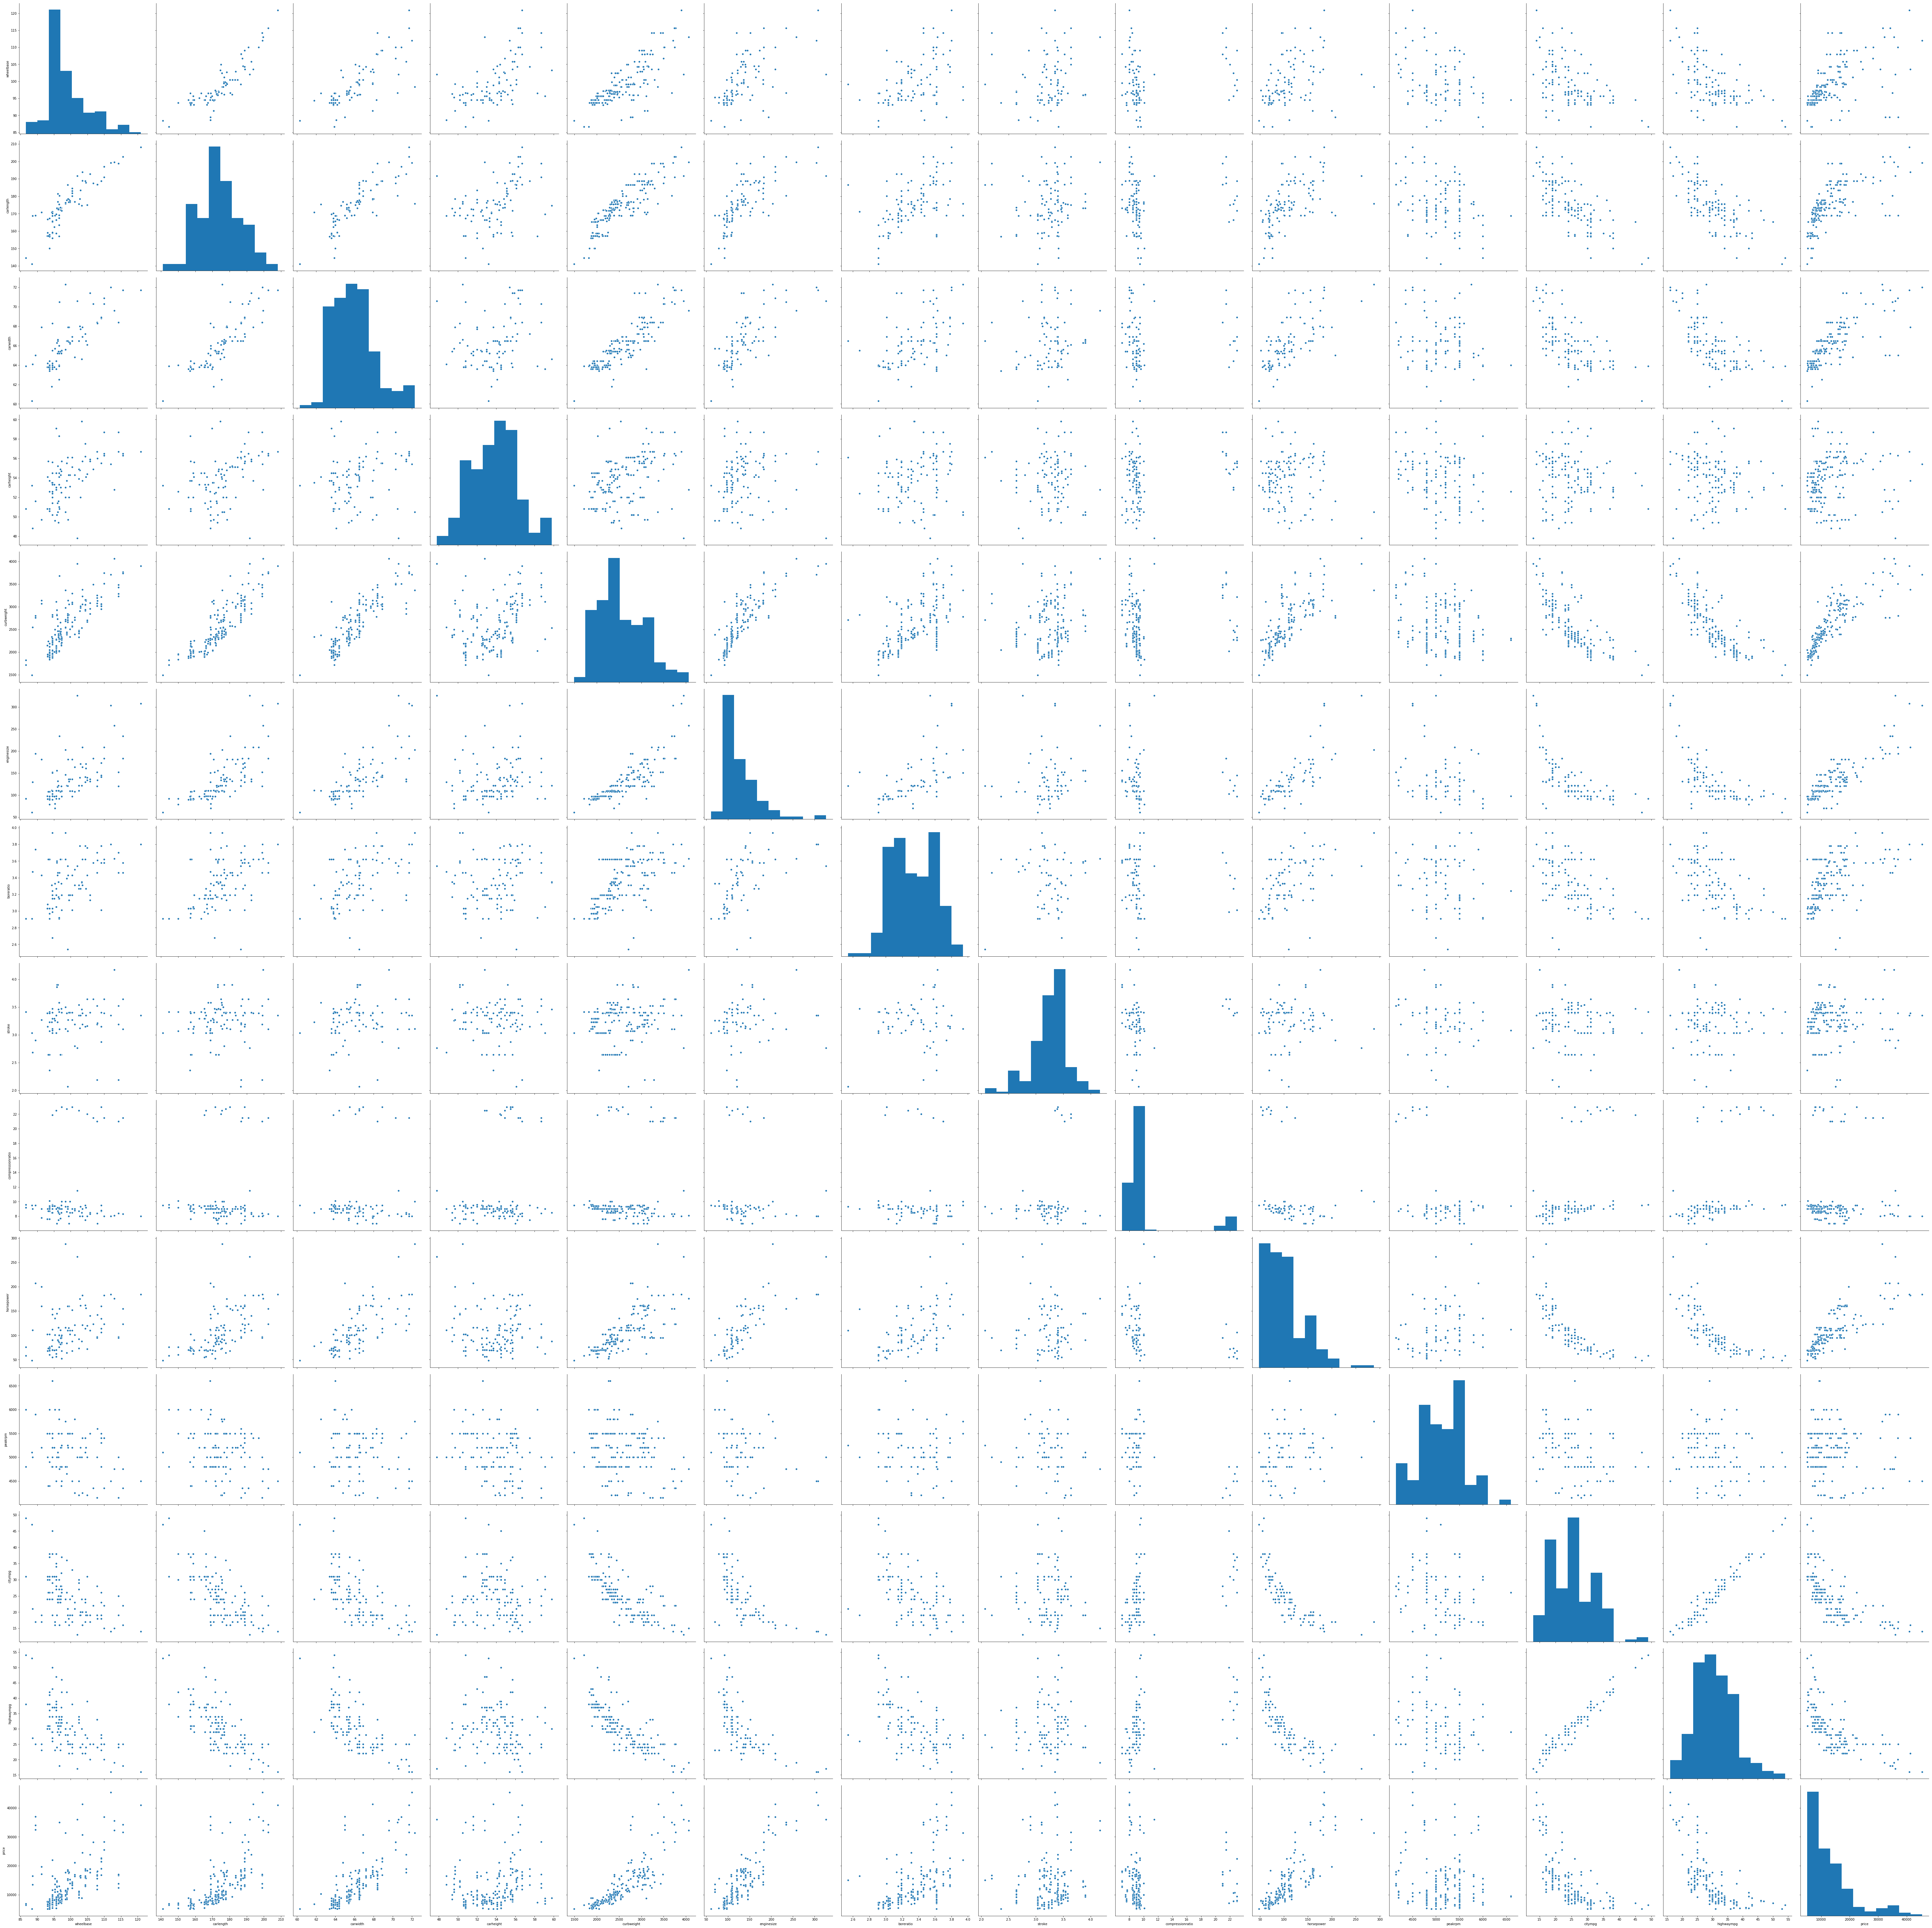

In [13]:
# visualize the numerical variables in data
sns.pairplot(carprice,size=6)
plt.show()


### Categorical Variables

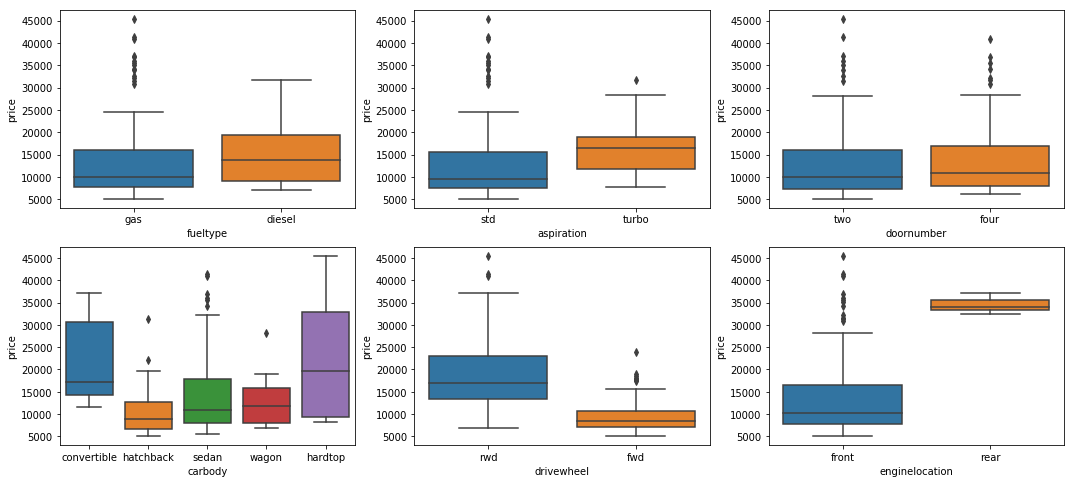

In [14]:
#visualise the categorical variables
plt.figure(figsize=(18,8))
plt.subplot(2,3,1)
sns.boxplot(x='fueltype',y='price',data=carprice)
plt.subplot(2,3,2)
sns.boxplot(x='aspiration',y='price',data=carprice)
plt.subplot(2,3,3)
sns.boxplot(x='doornumber',y='price',data=carprice)
plt.subplot(2,3,4)
sns.boxplot(x='carbody',y='price',data=carprice)
plt.subplot(2,3,5)
sns.boxplot(x='drivewheel',y='price',data=carprice)
plt.subplot(2,3,6)
sns.boxplot(x='enginelocation',y='price',data=carprice)
plt.show()
        

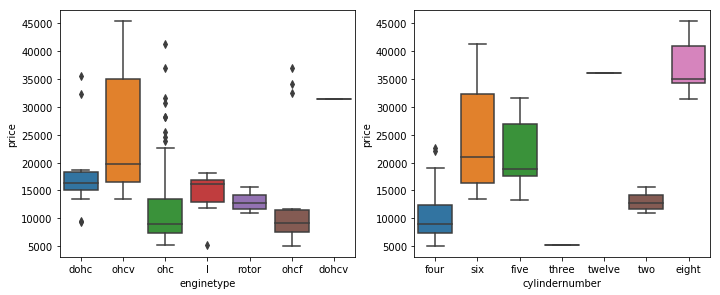

In [15]:
plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
sns.boxplot(x='enginetype',y='price',data=carprice)
plt.subplot(2,3,2)
sns.boxplot(x='cylindernumber',y='price',data=carprice) 
plt.show()

### Dealing With Categorical Variables

In [16]:
#reading the data to idnetify the number of levels in the categorical variables
print(carprice.fueltype.value_counts())
print(carprice.aspiration.value_counts())
print(carprice.cylindernumber.value_counts())
print(carprice.enginetype.value_counts())
print(carprice.enginelocation.value_counts())
print(carprice.drivewheel.value_counts())
print(carprice.carbody.value_counts())
print(carprice.doornumber.value_counts())
print(carprice.CarName.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
fwd    129
rwd     76
Name: drivewheel, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
Toyota         32
Nissan         18
Mazda          17
Honda          13
Mitsubishi     13
Subaru         12
Volvo          11
Peugeot        11
Volkswagen     10
Dodge           9
Bmw             8
Buick           8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Jaguar          3
Chevrolet       3
Al

There are some variables such as door number,drivewheel,enginelocation,aspiration and fueltype which have only two levels.

### Dealing Categorical Variables with Two Levels

In [17]:
#mapping the categorical variables with 0 and 1 
varlist=['doornumber','enginelocation','aspiration','fueltype','drivewheel']
carprice[varlist]=carprice[varlist].apply(lambda x:x.map({'two':0,'front':0,'std':0,'gas':0,'fwd':0,'four':1,'rear':1,'turbo':1,'diesel':1,'rwd':1}))
carprice[varlist].head()

,doornumber,enginelocation,aspiration,fueltype,drivewheel
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,1,0,0,0,0
4,1,0,0,0,0


### Dealing Cagtegorical Variables with More than Two Levels

In [18]:
#create dummy variables and apply derived metrics to categorical variables  
carbod=pd.get_dummies(carprice['carbody'])
enginetype=pd.get_dummies(carprice['enginetype'])
cylindernumber=pd.get_dummies(carprice['cylindernumber'])
carname=pd.get_dummies(carprice['CarName'])
carname.head()

,Alfa-Romero,Audi,Bmw,Buick,Chevrolet,Dodge,Honda,Isuzu,Jaguar,Mazda,...,Peugeot,Plymouth,Porsche,Renault,Saab,Subaru,Toyota,Volkswagen,Volvo,Vw
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For variables with n levels there will be n-1 levels that are generated as one is a reduntant variable

In [19]:
#dropping redundant dummy variable
carbod=pd.get_dummies(carprice['carbody'],drop_first=True)
enginetype=pd.get_dummies(carprice['enginetype'],drop_first=True)
cylindernumber=pd.get_dummies(carprice['cylindernumber'],drop_first=True)
carname=pd.get_dummies(carprice['CarName'],drop_first=True)

In [20]:
#concatting these values to the dataframe
carprice=pd.concat([carprice,carbod,enginetype,cylindernumber,carname],axis=1)
carprice

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,Peugeot,Plymouth,Porsche,Renault,Saab,Subaru,Toyota,Volkswagen,Volvo,Vw
0,Alfa-Romero,0,0,0,convertible,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,Alfa-Romero,0,0,0,convertible,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,Alfa-Romero,0,0,0,hatchback,1,0,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,Audi,0,0,1,sedan,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,Audi,0,0,1,sedan,0,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0
5,Audi,0,0,0,sedan,0,0,99.8,177.3,66.3,...,0,0,0,0,0,0,0,0,0,0
6,Audi,0,0,1,sedan,0,0,105.8,192.7,71.4,...,0,0,0,0,0,0,0,0,0,0
7,Audi,0,0,1,wagon,0,0,105.8,192.7,71.4,...,0,0,0,0,0,0,0,0,0,0
8,Audi,0,1,1,sedan,0,0,105.8,192.7,71.4,...,0,0,0,0,0,0,0,0,0,0
9,Audi,0,1,0,hatchback,0,0,99.5,178.2,67.9,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#dropping the values that are not relevant
carprice=carprice.drop('carbody',axis=1)
carprice= carprice.drop ('enginetype',axis=1)
carprice= carprice.drop('cylindernumber',axis=1)
carprice= carprice.drop('CarName',axis=1)
carprice.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,Peugeot,Plymouth,Porsche,Renault,Saab,Subaru,Toyota,Volkswagen,Volvo,Vw
0,0,0,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


#### Building a Model
The important aspects to be considered while building a model are:

1) Overfitting

2) Multicollinearity 

3) Feature selection

There are three important steps in feature selection and they are as follows:

    a) Try all possible combinations (2p models for p features)

    b)  Manual Feature Elimination

    c) Automated Approach

            ○ Recursive Feature Elimination(RFE)

            ○ Forward/Backward/Stepwise Selection based on AIC (not covered)
            

#### Splitting  Data Into Train and Test

In [22]:
df_train,df_test=train_test_split(carprice, train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(143, 57)
(62, 57)


There are two main methods of scaling that are used to normalze data in feature selection and they are:
    
a) MinMax scaling

b) Standardization

In [23]:
#scaling numerical variables using Min Max Scaler
Scaler=MinMaxScaler()
num_vars=['boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','enginesize','wheelbase','carlength','carwidth','carheight','curbweight']

In [24]:
df_train[num_vars]=Scaler.fit_transform(df_train[num_vars])
print(df_train.head())
df_train[num_vars].describe()

     fueltype  aspiration  doornumber  drivewheel  enginelocation  wheelbase  \
122         0           0           1           0               0   0.244828   
125         0           0           0           1               0   0.272414   
166         0           0           0           1               0   0.272414   
1           0           0           0           1               0   0.068966   
199         0           1           1           1               0   0.610345   

     carlength  carwidth  carheight  curbweight ...  Peugeot  Plymouth  \
122   0.426016  0.291667   0.265487    0.272692 ...        0         1   
125   0.452033  0.666667   0.212389    0.500388 ...        0         0   
166   0.448780  0.308333   0.424779    0.314973 ...        0         0   
1     0.450407  0.316667   0.088496    0.411171 ...        0         0   
199   0.775610  0.575000   0.858407    0.647401 ...        0         0   

     Porsche  Renault  Saab  Subaru  Toyota  Volkswagen  Volvo  Vw  
122  

,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,enginesize,wheelbase,carlength,carwidth,carheight,curbweight
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.241351,0.411141,0.525476,0.461655,0.509004,0.407878
std,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.154619,0.205581,0.204848,0.184517,0.215378,0.211269
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.135849,0.272414,0.399187,0.304167,0.353982,0.245539
50%,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343,0.184906,0.341379,0.502439,0.425000,0.522124,0.355702
75%,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479,0.301887,0.503448,0.669919,0.550000,0.668142,0.559542
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After scaling the max value of the numerical variables is almost one

#### Multicollinearity

Multicollinearity is the effect of having different predictor variables that are related to one another and these would have an impact on the quality of the model  and if there are more number of interrelated variables then the model would become reduntant.Pairwise correlation and variance inflation factor (VIF) are two parameters that are used to study multicollinearity.


In [25]:
a=df_train.corr()
corr=a.where(np.triu(np.ones(a.shape),k=1).astype(np.bool))
corr=corr.abs().unstack().reset_index()
#arranging variables with highest correlation in ascending order
corr.columns=['Variable','Varible2','Correlation']
corr.dropna(subset = ['Correlation'],inplace=True)
corr=corr.sort_values('Correlation',ascending=False)
corr

,Variable,Varible2,Correlation
1966,two,rotor,1.000000e+00
741,compressionratio,fueltype,9.836380e-01
985,highwaympg,citympg,9.733886e-01
2990,Subaru,ohcf,9.537936e-01
2703,Peugeot,l,9.393107e-01
519,curbweight,carlength,8.814955e-01
347,carlength,wheelbase,8.779090e-01
520,curbweight,carwidth,8.738840e-01
1036,price,enginesize,8.679148e-01
579,enginesize,curbweight,8.651025e-01


In [26]:
#dropping variables with high pairwise correlation
df_train=df_train.drop('compressionratio',axis=1)
df_train=df_train.drop('curbweight',axis=1)
df_train=df_train.drop('fueltype',axis=1)


In [27]:
df_train

,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,...,Peugeot,Plymouth,Porsche,Renault,Saab,Subaru,Toyota,Volkswagen,Volvo,Vw
122,0,1,0,0,0.244828,0.426016,0.291667,0.265487,0.139623,0.230159,...,0,1,0,0,0,0,0,0,0,0
125,0,0,1,0,0.272414,0.452033,0.666667,0.212389,0.339623,1.000000,...,0,0,1,0,0,0,0,0,0,0
166,0,0,1,0,0.272414,0.448780,0.308333,0.424779,0.139623,0.444444,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0.068966,0.450407,0.316667,0.088496,0.260377,0.626984,...,0,0,0,0,0,0,0,0,0,0
199,1,1,1,0,0.610345,0.775610,0.575000,0.858407,0.260377,0.746032,...,0,0,0,0,0,0,0,0,1,0
190,0,0,0,0,0.272414,0.400000,0.308333,0.318584,0.181132,0.404762,...,0,0,0,0,0,0,0,0,0,1
96,0,1,0,0,0.272414,0.393496,0.291667,0.592920,0.135849,0.373016,...,0,0,0,0,0,0,0,0,0,0
177,0,1,0,0,0.544828,0.560976,0.516667,0.539823,0.230189,0.500000,...,0,0,0,0,0,0,1,0,0,0
181,0,1,1,0,0.617241,0.759350,0.516667,0.557522,0.377358,0.468254,...,0,0,0,0,0,0,1,0,0,0
97,0,1,0,0,0.272414,0.473171,0.291667,0.504425,0.135849,0.373016,...,0,0,0,0,0,0,0,0,0,0


There are three methods of feature selection which are demonstrated below.

#### Manual Feature Selection

In [28]:
y_train=df_train.pop('price')
X_train=df_train

In [29]:
X_train_sm=sm.add_constant(X_train['wheelbase'])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const       -0.049240
wheelbase    0.653182
dtype: float64

In [30]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     89.25
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           1.03e-16
Time:                        23:26:05   Log-Likelihood:                 52.012
No. Observations:                 143   AIC:                            -100.0
Df Residuals:                     141   BIC:                            -94.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0492      0.032     -1.550      0.123      -0.112       0.014
wheelbase      0.6532      0.069      9.447      0.000       0.516       0.790
==============================================================================
Omnibus:                       81.027   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              332.436
Skew:                           2.161   Prob(JB):                     6.49e-73
Kurtosis:                       9.092   Cond. No.                         5.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#add another variable
X_train_sm=X_train[['wheelbase','carwidth']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     124.2
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           9.48e-32
Time:                        23:26:05   Log-Likelihood:                 89.913
No. Observations:                 143   AIC:                            -173.8
Df Residuals:                     140   BIC:                            -164.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2120      0.029     -7.193      0.000      -0.270      -0.154
wheelbase     -0.0415      0.088     -0.471      0.639      -0.216       0.133
carwidth       0.9712      0.098      9.893      0.000       0.777       1.165
==============================================================================
Omnibus:                       77.615   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              369.908
Skew:                           1.962   Prob(JB):                     4.74e-81
Kurtosis:                       9.832   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#add another variable
X_train_sm=X_train[['wheelbase','carwidth','enginesize']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     187.3
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           1.23e-48
Time:                        23:26:06   Log-Likelihood:                 132.64
No. Observations:                 143   AIC:                            -257.3
Df Residuals:                     139   BIC:                            -245.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1686      0.022     -7.556      0.000      -0.213      -0.124
wheelbase     -0.0185      0.066     -0.282      0.778      -0.148       0.111
carwidth       0.4087      0.090      4.535      0.000       0.231       0.587
enginesize     0.8569      0.080     10.661      0.000       0.698       1.016
==============================================================================
Omnibus:                       44.341   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.808
Skew:                           1.244   Prob(JB):                     3.19e-25
Kurtosis:                       6.570   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding variables to the model is known to have an effect on R-square and adjusted R-square.However, manual addition of variables to improve the model is a tedious process becuase of which other methods are used to improve the model.

###  Manual Feature Elimination

In [33]:
X_train.values

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [34]:
#building the model
X_train_sm=X_train
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     62.51
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           8.46e-54
Time:                        23:26:06   Log-Likelihood:                 268.95
No. Observations:                 143   AIC:                            -437.9
Df Residuals:                      93   BIC:                            -289.8
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4886      0.166     -2.939      0.004      -0.819      -0.159
aspiration         0.0976      0.019      5.059      0.000       0.059       0.136
doornumber         0.0164      0.014      1.161      0.249      -0.012       0.044
drivewheel         0.0350      0.023      1.496      0.138      -0.011       0.082
enginelocation     0.1544      0.068      2.283      0.025       0.020       0.289
wheelbase          0.1328      0.087      1.526      0.130      -0.040       0.305
carlength         -0.0817      0.095     -0.862      0.391      -0.270       0.107
carwidth           0.3187      0.098      3.243      0.002       0.124       0.514
carheight         -0.1136      0.050     -2.268      0.026      -0.213      -0.014
enginesize         2.4473      0.411      5.958      0.000       1.632       3.263
boreratio         -0.7191      0.165     -4.348      0.000      -1.048      -0.391
stroke            -0.2706      0.080     -3.387      0.001      -0.429      -0.112
horsepower        -0.1618      0.147     -1.098      0.275      -0.454       0.131
peakrpm            0.1521      0.048      3.137      0.002       0.056       0.248
citympg           -0.1350      0.154     -0.879      0.382      -0.440       0.170
highwaympg         0.1155      0.140      0.826      0.411      -0.162       0.393
hardtop           -0.0857      0.060     -1.433      0.155      -0.204       0.033
hatchback         -0.0876      0.048     -1.824      0.071      -0.183       0.008
sedan             -0.0716      0.051     -1.415      0.160      -0.172       0.029
wagon             -0.0418      0.055     -0.762      0.448      -0.151       0.067
dohcv              0.2777      0.152      1.831      0.070      -0.024       0.579
l                  0.2737      0.080      3.442      0.001       0.116       0.432
ohc                0.0102      0.044      0.232      0.817      -0.077       0.098
ohcf               0.1656      0.041      4.018      0.000       0.084       0.247
ohcv              -0.0288      0.038     -0.750      0.455      -0.105       0.047
rotor              0.4536      0.108      4.202      0.000       0.239       0.668
five               0.3506      0.135      2.598      0.011       0.083       0.619
four               0.5289      0.179      2.952      0.004       0.173       0.885
six                0.1508      0.102      1.481      0.142      -0.051       0.353
three              0.5470      0.122      4.471      0.000       0.304       0.790
twelve            -0.6139      0.126     -4.854      0.000      -0.865      -0.363
two                0.4536      0.108      4.202      0.000       0.239       0.668
Audi               0.0867      0.086      1.002      0.319      -0.085       0.258
Bmw                0.3582      0.095      3.790      0.000       0.171       0.546
Buick       

In [35]:
# calculating variance inflation factor which is an important aspect in eliminating variables
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
21,l,inf
49,Subaru,inf
44,Peugeot,inf
4,enginelocation,inf
31,two,inf
29,three,inf
25,rotor,inf
23,ohcf,inf
0,const,1887.640000
27,four,420.710000


Variables with high-p values, high Vif values are manually scanned and eliminated.By manually screening the values citympg, highwaympg, carheight, wheelbase, horsepower and carlength are identified as the values thjat need to be eliminated.

In [36]:
X_train_sm=X_train_sm.drop('citympg',axis=1)
X_train_sm=X_train_sm.drop('highwaympg',axis=1)
X_train_sm=X_train_sm.drop('carheight',axis=1)
X_train_sm=X_train_sm.drop('wheelbase',axis=1)
X_train_sm=X_train_sm.drop('horsepower',axis=1)
X_train_sm=X_train_sm.drop('carlength',axis=1)


In [37]:
X_train_sm

,const,aspiration,doornumber,drivewheel,enginelocation,carwidth,enginesize,boreratio,stroke,peakrpm,...,Peugeot,Plymouth,Porsche,Renault,Saab,Subaru,Toyota,Volkswagen,Volvo,Vw
122,1.0,0,1,0,0,0.291667,0.139623,0.230159,0.525253,0.551020,...,0,1,0,0,0,0,0,0,0,0
125,1.0,0,0,1,0,0.666667,0.339623,1.000000,0.464646,0.551020,...,0,0,1,0,0,0,0,0,0,0
166,1.0,0,0,1,0,0.308333,0.139623,0.444444,0.449495,1.000000,...,0,0,0,0,0,0,1,0,0,0
1,1.0,0,0,1,0,0.316667,0.260377,0.626984,0.247475,0.346939,...,0,0,0,0,0,0,0,0,0,0
199,1.0,1,1,1,0,0.575000,0.260377,0.746032,0.484848,0.387755,...,0,0,0,0,0,0,0,0,1,0
190,1.0,0,0,0,0,0.308333,0.181132,0.404762,0.611111,0.551020,...,0,0,0,0,0,0,0,0,0,1
96,1.0,0,1,0,0,0.291667,0.135849,0.373016,0.555556,0.428571,...,0,0,0,0,0,0,0,0,0,0
177,1.0,0,1,0,0,0.516667,0.230189,0.500000,0.681818,0.020408,...,0,0,0,0,0,0,1,0,0,0
181,1.0,0,1,1,0,0.516667,0.377358,0.468254,0.585859,0.428571,...,0,0,0,0,0,0,1,0,0,0
97,1.0,0,1,0,0,0.291667,0.135849,0.373016,0.555556,0.428571,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#buidling new model after eliminating these variables
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     62.51
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           8.46e-54
Time:                        23:26:07   Log-Likelihood:                 268.95
No. Observations:                 143   AIC:                            -437.9
Df Residuals:                      93   BIC:                            -289.8
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4886      0.166     -2.939      0.004      -0.819      -0.159
aspiration         0.0976      0.019      5.059      0.000       0.059       0.136
doornumber         0.0164      0.014      1.161      0.249      -0.012       0.044
drivewheel         0.0350      0.023      1.496      0.138      -0.011       0.082
enginelocation     0.1544      0.068      2.283      0.025       0.020       0.289
wheelbase          0.1328      0.087      1.526      0.130      -0.040       0.305
carlength         -0.0817      0.095     -0.862      0.391      -0.270       0.107
carwidth           0.3187      0.098      3.243      0.002       0.124       0.514
carheight         -0.1136      0.050     -2.268      0.026      -0.213      -0.014
enginesize         2.4473      0.411      5.958      0.000       1.632       3.263
boreratio         -0.7191      0.165     -4.348      0.000      -1.048      -0.391
stroke            -0.2706      0.080     -3.387      0.001      -0.429      -0.112
horsepower        -0.1618      0.147     -1.098      0.275      -0.454       0.131
peakrpm            0.1521      0.048      3.137      0.002       0.056       0.248
citympg           -0.1350      0.154     -0.879      0.382      -0.440       0.170
highwaympg         0.1155      0.140      0.826      0.411      -0.162       0.393
hardtop           -0.0857      0.060     -1.433      0.155      -0.204       0.033
hatchback         -0.0876      0.048     -1.824      0.071      -0.183       0.008
sedan             -0.0716      0.051     -1.415      0.160      -0.172       0.029
wagon             -0.0418      0.055     -0.762      0.448      -0.151       0.067
dohcv              0.2777      0.152      1.831      0.070      -0.024       0.579
l                  0.2737      0.080      3.442      0.001       0.116       0.432
ohc                0.0102      0.044      0.232      0.817      -0.077       0.098
ohcf               0.1656      0.041      4.018      0.000       0.084       0.247
ohcv              -0.0288      0.038     -0.750      0.455      -0.105       0.047
rotor              0.4536      0.108      4.202      0.000       0.239       0.668
five               0.3506      0.135      2.598      0.011       0.083       0.619
four               0.5289      0.179      2.952      0.004       0.173       0.885
six                0.1508      0.102      1.481      0.142      -0.051       0.353
three              0.5470      0.122      4.471      0.000       0.304       0.790
twelve            -0.6139      0.126     -4.854      0.000      -0.865      -0.363
two                0.4536      0.108      4.202      0.000       0.239       0.668
Audi               0.0867      0.086      1.002      0.319      -0.085       0.258
Bmw                0.3582      0.095      3.790      0.000       0.171       0.546
Buick       

In [39]:
# calculating variance inflation factor which is an important aspect in eliminating variables
vif=pd.DataFrame()
vif['Features']=X_train_sm.columns
vif['VIF']=[variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
21,l,inf
49,Subaru,inf
44,Peugeot,inf
4,enginelocation,inf
31,two,inf
29,three,inf
25,rotor,inf
23,ohcf,inf
0,const,1887.640000
27,four,420.710000


The first model had R-squared:0.971 and Adj. R-squared:0.955 whereas the second model has R-squared:0.983 and Adj. R-squared:0.975, further removal of undesirable features would improve the model.The automated methods to build and enhance the variables are performed at later stages


In [40]:
y_train_pred=lr_model.predict(X_train_sm)
y_train_pred

122    0.092273
125    0.466890
166    0.088588
1      0.269509
199    0.355635
190    0.127055
96     0.044006
177    0.149430
181    0.266156
97     0.077359
120    0.017737
117    0.319260
57     0.200011
44     0.095884
153    0.042176
85     0.050905
127    0.798685
151    0.043991
204    0.476173
10     0.395139
20     0.050631
170    0.222293
82     0.238367
12     0.483935
16     0.801862
178    0.340599
90     0.122407
89     0.027606
45     0.112285
161    0.057515
         ...   
129    0.726096
159    0.072826
132    0.236994
108    0.319172
155    0.041572
130    0.126690
86     0.050905
93     0.077359
137    0.339758
144    0.075756
58     0.273190
60     0.154423
107    0.165246
143    0.125857
203    0.488369
34     0.075166
14     0.530753
66     0.249297
53     0.071082
98     0.032204
180    0.324949
94     0.027606
138   -0.038996
176    0.155323
79     0.076291
87     0.153808
103    0.264171
67     0.626049
24     0.026743
8      0.474420
Length: 143, dtype: floa

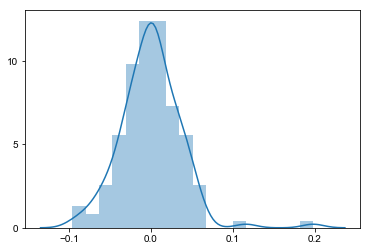

In [41]:
#residual analysis for error identification
res=y_train-y_train_pred
sns.distplot(res)
sns.set(font_scale=2)


In [42]:
#testing the model
num_vars=['boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','enginesize','wheelbase','carlength','carwidth','carheight','curbweight']
df_test[num_vars]=Scaler.transform(df_test[num_vars])
df_test.describe()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,Peugeot,Plymouth,Porsche,Renault,Saab,Subaru,Toyota,Volkswagen,Volvo,Vw
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.0
mean,0.112903,0.177419,0.564516,0.419355,0.032258,0.437764,0.559481,0.480376,0.559663,0.428470,...,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645,0.0
std,0.319058,0.385142,0.499868,0.497482,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,...,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.387931,0.547967,0.441667,0.588496,0.406129,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.570690,0.719919,0.516667,0.699115,0.564876,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [43]:
y_test=df_test.pop('price')
X_test=df_test

In [44]:
X_test_sm=X_test
X_test_sm=sm.add_constant(X_test_sm)
lr1=sm.OLS(y_test,X_test_sm)
lr1_model=lr1.fit()
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     34.28
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           5.19e-11
Time:                        23:26:10   Log-Likelihood:                 139.77
No. Observations:                  62   AIC:                            -191.5
Df Residuals:                      18   BIC:                            -97.95
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.0809      0.378      2.858      0.010       0.286       1.875
fueltype            -0.2118      0.375     -0.564      0.580      -1.001       0.577
aspiration           0.0048      0.046      0.104      0.918      -0.093       0.102
doornumber           0.0272      0.034      0.811      0.428      -0.043       0.098
drivewheel           0.0171      0.042      0.408      0.688      -0.071       0.105
enginelocation       0.1260      0.052      2.409      0.027       0.016       0.236
wheelbase           -0.0365      0.190     -0.192      0.850      -0.436       0.363
carlength           -0.2676      0.191     -1.402      0.178      -0.669       0.134
carwidth             0.1312      0.173      0.758      0.458      -0.233       0.495
carheight           -0.0472      0.152     -0.311      0.760      -0.366       0.272
curbweight           0.9416      0.399      2.357      0.030       0.102       1.781
enginesize          -0.4003      0.541     -0.740      0.469      -1.537       0.736
boreratio           -0.0477      0.104     -0.458      0.652      -0.267       0.171
stroke              -0.0592      0.108     -0.550      0.589      -0.285       0.167
compressionratio     0.2478      0.455      0.545      0.593      -0.708       1.204
horsepower           0.0968      0.343      0.282      0.781      -0.623       0.817
peakrpm             -0.1316      0.133     -0.990      0.335      -0.411       0.148
citympg             -0.3049      0.316     -0.965      0.347      -0.969       0.359
highwaympg           0.1592      0.243      0.654      0.521      -0.352       0.670
hardtop             -0.0729      0.059     -1.234      0.233      -0.197       0.051
hatchback           -0.0948      0.064     -1.489      0.154      -0.229       0.039
sedan               -0.0795      0.070     -1.135      0.271      -0.227       0.068
wagon               -0.1155      0.092     -1.262      0.223      -0.308       0.077
dohcv            -7.022e-16   4.53e-16     -1.551      0.138   -1.65e-15    2.49e-16
l                   -0.0725      0.059     -1.234      0.233      -0.196       0.051
ohc                 -0.1025      0.087     -1.176      0.255      -0.286       0.081
ohcf                -0.0022      0.064     -0.035      0.972      -0.137       0.132
ohcv                -0.4265      0.145     -2.934      0.009      -0.732      -0.121
rotor             3.054e-16   8.47e-16      0.360      0.723   -1.47e-15    2.09e-15
five                -0.8264      0.292     -2.827      0.011      -1.441      -0.212
four                -0.8410      0.279     -3.011      0.008      -1.428      -0.254
six                 -0.6211      0.211     -2.942      0.009      -1.065      -0.178
three              3.37e-15   1.33e-15      2.531      0.021    5.72e-16    6.17e-15
twelve           -1.471

In [45]:
y_test_pred=lr1_model.predict(X_test_sm)


In [46]:
y_test_pred

160    0.040856
186    0.094319
59     0.140651
165    0.131356
140    0.068652
64     0.174926
198    0.382053
75     0.314529
172    0.364437
104    0.313718
200    0.306532
136    0.344153
111    0.321108
41     0.187185
73     1.063252
31     0.062142
156    0.060856
133    0.227581
65     0.299445
83     0.255142
195    0.279527
197    0.273979
126    0.774940
118   -0.022497
167    0.136875
101    0.251578
124    0.244048
69     0.637014
11     0.326187
46     0.163826
         ...   
110    0.235449
201    0.378210
115    0.292022
174    0.144203
134    0.257230
169    0.118959
92     0.040391
173    0.092444
74     1.039795
3      0.243998
157    0.056601
81     0.083834
32     0.051929
99     0.113268
26     0.076491
88     0.149376
184    0.098027
187    0.128312
52     0.067161
168    0.135414
164    0.064269
188    0.111427
7      0.381302
158    0.070533
123    0.107288
28     0.099476
29     0.214673
182    0.069753
40     0.113750
128    0.863869
Length: 62, dtype: float

In [47]:
#calculating the r2_Score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.9879372614659788

### Automated Model Building

In [48]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('aspiration', False, 10),
 ('doornumber', False, 38),
 ('drivewheel', False, 36),
 ('enginelocation', True, 1),
 ('wheelbase', False, 25),
 ('carlength', False, 29),
 ('carwidth', True, 1),
 ('carheight', False, 26),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('horsepower', False, 17),
 ('peakrpm', False, 16),
 ('citympg', False, 19),
 ('highwaympg', False, 20),
 ('hardtop', False, 34),
 ('hatchback', False, 33),
 ('sedan', False, 35),
 ('wagon', False, 37),
 ('dohcv', False, 11),
 ('l', False, 5),
 ('ohc', False, 40),
 ('ohcf', False, 22),
 ('ohcv', False, 15),
 ('rotor', True, 1),
 ('five', False, 3),
 ('four', False, 2),
 ('six', False, 12),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('Audi', False, 14),
 ('Bmw', True, 1),
 ('Buick', False, 13),
 ('Chevrolet', False, 43),
 ('Dodge', False, 21),
 ('Honda', False, 23),
 ('Isuzu', False, 28),
 ('Jaguar', False, 24),
 ('Mazda', False, 32),
 ('Mercury', False, 44),
 ('Mitsubishi', Fals

In [51]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'enginesize', 'boreratio', 'stroke',
       'rotor', 'three', 'twelve', 'two', 'Bmw'],
      dtype='object')

In [52]:
X_train.columns[~rfe.support_]

Index(['aspiration', 'doornumber', 'drivewheel', 'wheelbase', 'carlength',
       'carheight', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'five', 'four', 'six', 'Audi', 'Buick', 'Chevrolet', 'Dodge',
       'Honda', 'Isuzu', 'Jaguar', 'Mazda', 'Mercury', 'Mitsubishi', 'Nissan',
       'Peugeot', 'Plymouth', 'Porsche', 'Renault', 'Saab', 'Subaru', 'Toyota',
       'Volkswagen', 'Volvo', 'Vw'],
      dtype='object')

In [53]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [54]:
X_train_rfe

,enginelocation,carwidth,enginesize,boreratio,stroke,rotor,three,twelve,two,Bmw
122,0,0.291667,0.139623,0.230159,0.525253,0,0,0,0,0
125,0,0.666667,0.339623,1.000000,0.464646,0,0,0,0,0
166,0,0.308333,0.139623,0.444444,0.449495,0,0,0,0,0
1,0,0.316667,0.260377,0.626984,0.247475,0,0,0,0,0
199,0,0.575000,0.260377,0.746032,0.484848,0,0,0,0,0
190,0,0.308333,0.181132,0.404762,0.611111,0,0,0,0,0
96,0,0.291667,0.135849,0.373016,0.555556,0,0,0,0,0
177,0,0.516667,0.230189,0.500000,0.681818,0,0,0,0,0
181,0,0.516667,0.377358,0.468254,0.585859,0,0,0,0,0
97,0,0.291667,0.135849,0.373016,0.555556,0,0,0,0,0


In [55]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [56]:
lm = sm.OLS(y_train,X_train_rfe).fit()
# summary of  linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     142.2
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           9.26e-64
Time:                        23:26:12   Log-Likelihood:                 185.92
No. Observations:                 143   AIC:                            -351.8
Df Residuals:                     133   BIC:                            -322.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1197      0.030     -4.

In [57]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
24,rotor,inf
48,Subaru,inf
3,enginelocation,inf
43,Peugeot,inf
30,two,inf
28,three,inf
22,ohcf,inf
20,l,inf
8,enginesize,367.960000
13,citympg,241.310000


In [58]:
y_train_price = lm.predict(X_train_rfe)

In [59]:
y_train_price

122    0.057714
125    0.344567
166    0.052143
1      0.168627
199    0.254060
190    0.072957
96     0.035019
177    0.200500
181    0.346277
97     0.035019
120    0.030987
117    0.309961
57     0.209953
44     0.025131
153    0.035148
85     0.156636
127    0.798685
151    0.035148
204    0.347257
10     0.337309
20     0.025131
170    0.219217
82     0.262231
12     0.516129
16     0.755164
178    0.429291
90     0.057498
89     0.035019
45     0.025131
161    0.076164
         ...   
129    0.683643
159    0.089084
132    0.207034
108    0.346829
155    0.035148
130    0.198157
86     0.156636
93     0.035019
137    0.207034
144    0.138437
58     0.243362
60     0.203082
107    0.281553
143    0.138437
203    0.411340
34     0.039728
14     0.602939
66     0.207354
53     0.050742
98     0.035019
180    0.379686
94     0.035019
138    0.036736
176    0.200500
79     0.042401
87     0.132101
103    0.404331
67     0.531712
24     0.030987
8      0.457542
Length: 143, dtype: floa

In [60]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

In [61]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.6
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           1.94e-63
Time:                        23:26:13   Log-Likelihood:                 182.36
No. Observations:                 143   AIC:                            -346.7
Df Residuals:                     134   BIC:                            -320.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1437      0.029     -4.

In [62]:
X_train_new.columns

Index(['const', 'enginelocation', 'carwidth', 'enginesize', 'boreratio',
       'stroke', 'rotor', 'three', 'two', 'Bmw'],
      dtype='object')

In [63]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [64]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,rotor,inf
7,two,inf
1,carwidth,21.890000
2,enginesize,10.060000
3,boreratio,9.260000
4,stroke,6.430000
8,Bmw,1.140000
0,enginelocation,1.120000
6,three,1.030000


In [65]:
y_train_price = lm.predict(X_train_lm)

In [66]:
y_train_price

122    0.054916
125    0.348122
166    0.052741
1      0.151105
199    0.258116
190    0.074386
96     0.038153
177    0.208002
181    0.330597
97     0.038153
120    0.031894
117    0.316005
57     0.211111
44     0.024266
153    0.032048
85     0.160546
127    0.798685
151    0.032048
204    0.354141
10     0.353774
20     0.024266
170    0.219611
82     0.266779
12     0.510911
16     0.748397
178    0.411973
90     0.058151
89     0.038153
45     0.024266
161    0.075504
         ...   
129    0.673094
159    0.091784
132    0.209901
108    0.353712
155    0.032048
130    0.212441
86     0.160546
93     0.038153
137    0.209901
144    0.136914
58     0.239888
60     0.209108
107    0.290434
143    0.136914
203    0.404177
34     0.042806
14     0.602959
66     0.213275
53     0.051795
98     0.038153
180    0.359374
94     0.038153
138    0.029127
176    0.208002
79     0.044521
87     0.137426
103    0.381302
67     0.528870
24     0.031894
8      0.465861
Length: 143, dtype: floa

Text(0.5, 0, 'Errors')

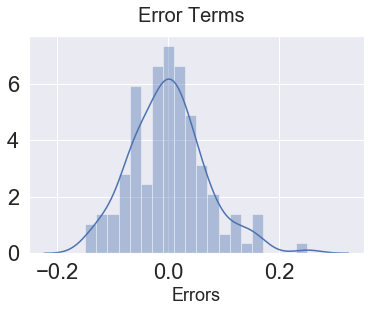

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

In [68]:
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [69]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [70]:
y_pred

160    0.075504
186    0.140135
59     0.209108
165    0.052741
140    0.066782
64     0.209108
198    0.258116
75     0.313050
172    0.219611
104    0.442668
200    0.354141
136    0.209901
111    0.331624
41     0.124985
73     0.947950
31     0.038422
156    0.075504
133    0.209901
65     0.229389
83     0.266145
195    0.279626
197    0.279626
126    0.798685
118    0.031894
167    0.219611
101    0.381302
124    0.266145
69     0.528870
11     0.353774
46     0.147547
         ...   
110    0.353712
201    0.349758
115    0.290434
174    0.183832
134    0.314496
169    0.219611
92     0.038153
173    0.208002
74     0.949588
3      0.170817
157    0.075504
81     0.160546
32     0.019400
99     0.146880
26     0.031894
88     0.137426
184    0.117014
187    0.117014
52     0.051795
168    0.219611
164    0.057971
188    0.140135
7      0.476445
158    0.091784
123    0.125480
28     0.126114
29     0.263863
182    0.117014
40     0.006637
128    0.798685
Length: 62, dtype: float

Text(0, 0.5, 'y_pred')

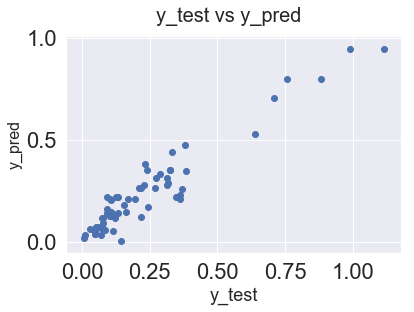

In [71]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [72]:
#calculating the r2_Score
r2_score(y_true=y_pred,y_pred=y_test_pred)

0.9071553898376811